In [46]:
import requests as r
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
#puxando dados API
url = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parameters = {'id': 204554} #aqui os parametros escolhidos para visualizar só um registro
response = r.request( 'GET', url)
objetos = json.loads(response.text) #loads serve para obter os dados em um formato dicionario
dados = objetos['dados']

In [15]:
dados

[{'id': 204554,
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
  'nome': 'Abílio Santana',
  'siglaPartido': 'PSC',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36833',
  'siglaUf': 'BA',
  'idLegislatura': 56,
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg',
  'email': None}]

In [34]:
#estruturando os dados para um dataframe
df = pd.DataFrame(dados)
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PSC,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,None
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,None
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,None
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,None
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,None


[]

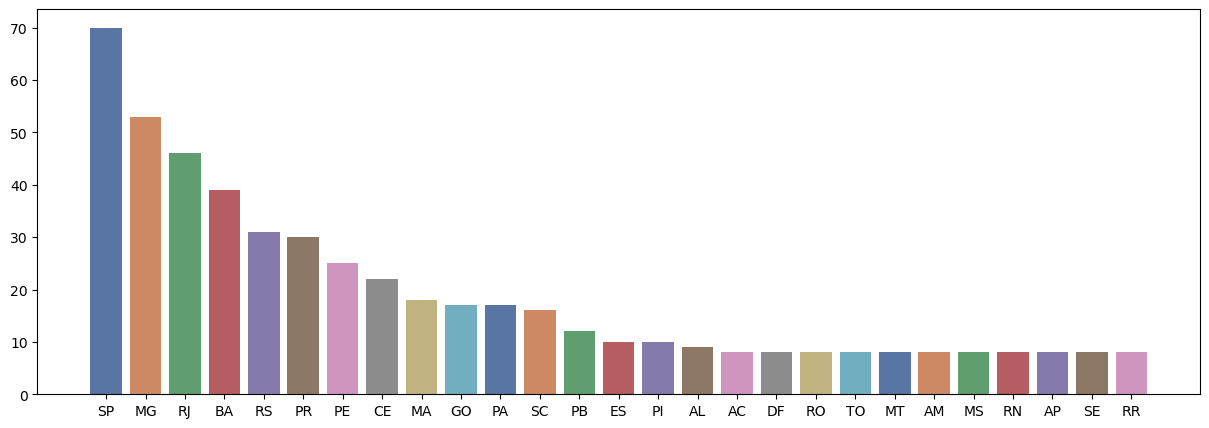

In [43]:
#Uma informação importante é a quantidade de deputados pela UF. 
#Aqui usaremos a função figure do matplotlib para ajustar o tamanho do gráfico. 
#A função barplot do seaborn para gerar um gráfico de barras. 
#E a função plot do matplotlib para exibir o gráfico gerado.
x = df['siglaUf'].value_counts().index #pega os estados
y = df['siglaUf'].value_counts().values #pega quantas vezes os estados aparecem nos registros
plt.figure(figsize = (15,5))
sns.barplot(x=x, y=y, palette='deep') #atribui as variaveis aos eixos e define as cores
plt.plot()

In [39]:
x

Index(['SP', 'MG', 'RJ', 'BA', 'RS', 'PR', 'PE', 'CE', 'MA', 'GO', 'PA', 'SC',
       'PB', 'ES', 'PI', 'AL', 'AC', 'DF', 'RO', 'TO', 'MT', 'AM', 'MS', 'RN',
       'AP', 'SE', 'RR'],
      dtype='object')

[]

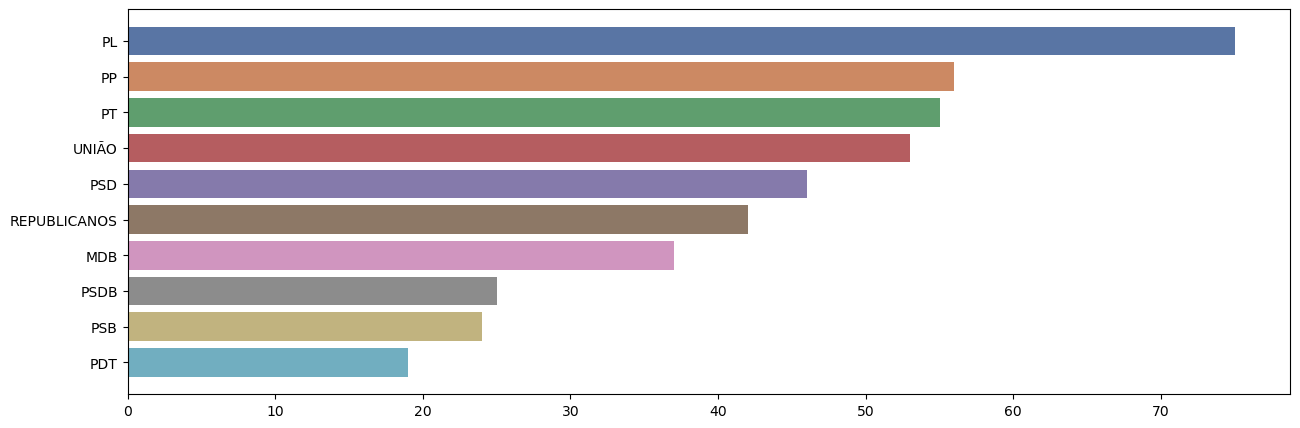

In [44]:
# Análise da quantidade de deputados por Partido
x = df['siglaPartido'].value_counts().head(10).values
y = df['siglaPartido'].value_counts().head(10).index
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()